In [5]:
# Importing the necessary packages
from pandas import read_csv
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [6]:
gas_data = pd.read_csv("gas_turbines.csv")

In [7]:
gas_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [8]:
gas_data.shape

(15039, 11)

In [9]:
gas_data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [10]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [11]:
gas_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [12]:
gas_data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

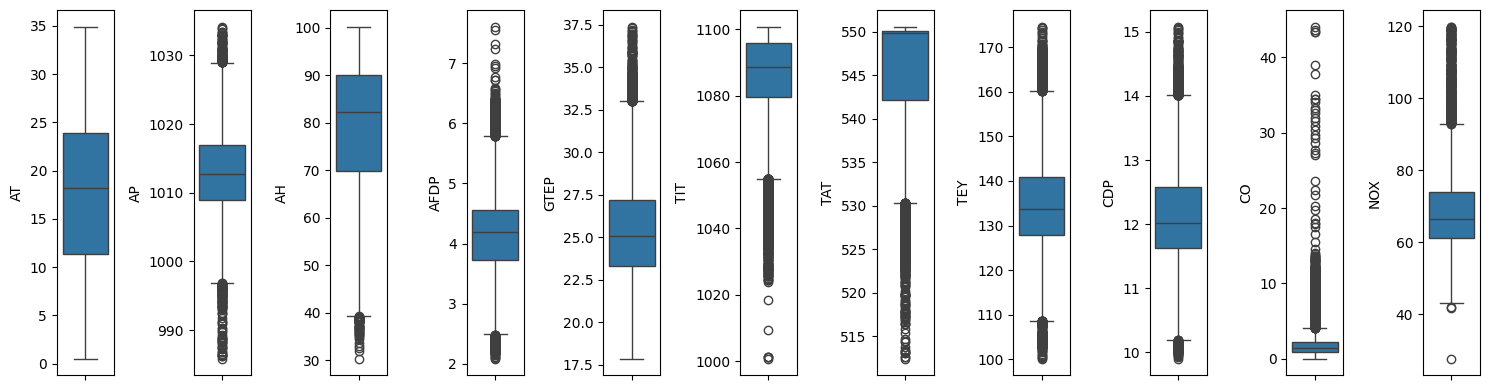

In [13]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 11, figsize=(15,4))
sns.boxplot(gas_data.AT, ax=ax[0])
sns.boxplot(gas_data.AP, ax=ax[1])
sns.boxplot(gas_data.AH, ax=ax[2])
sns.boxplot(gas_data.AFDP, ax=ax[3])
sns.boxplot(gas_data.GTEP, ax=ax[4])
sns.boxplot(gas_data.TIT, ax=ax[5])
sns.boxplot(gas_data.TAT, ax=ax[6])
sns.boxplot(gas_data.TEY, ax=ax[7])
sns.boxplot(gas_data.CDP, ax=ax[8])
sns.boxplot(gas_data.CO, ax=ax[9])
sns.boxplot(gas_data.NOX, ax=ax[10])
plt.tight_layout()
plt.show()

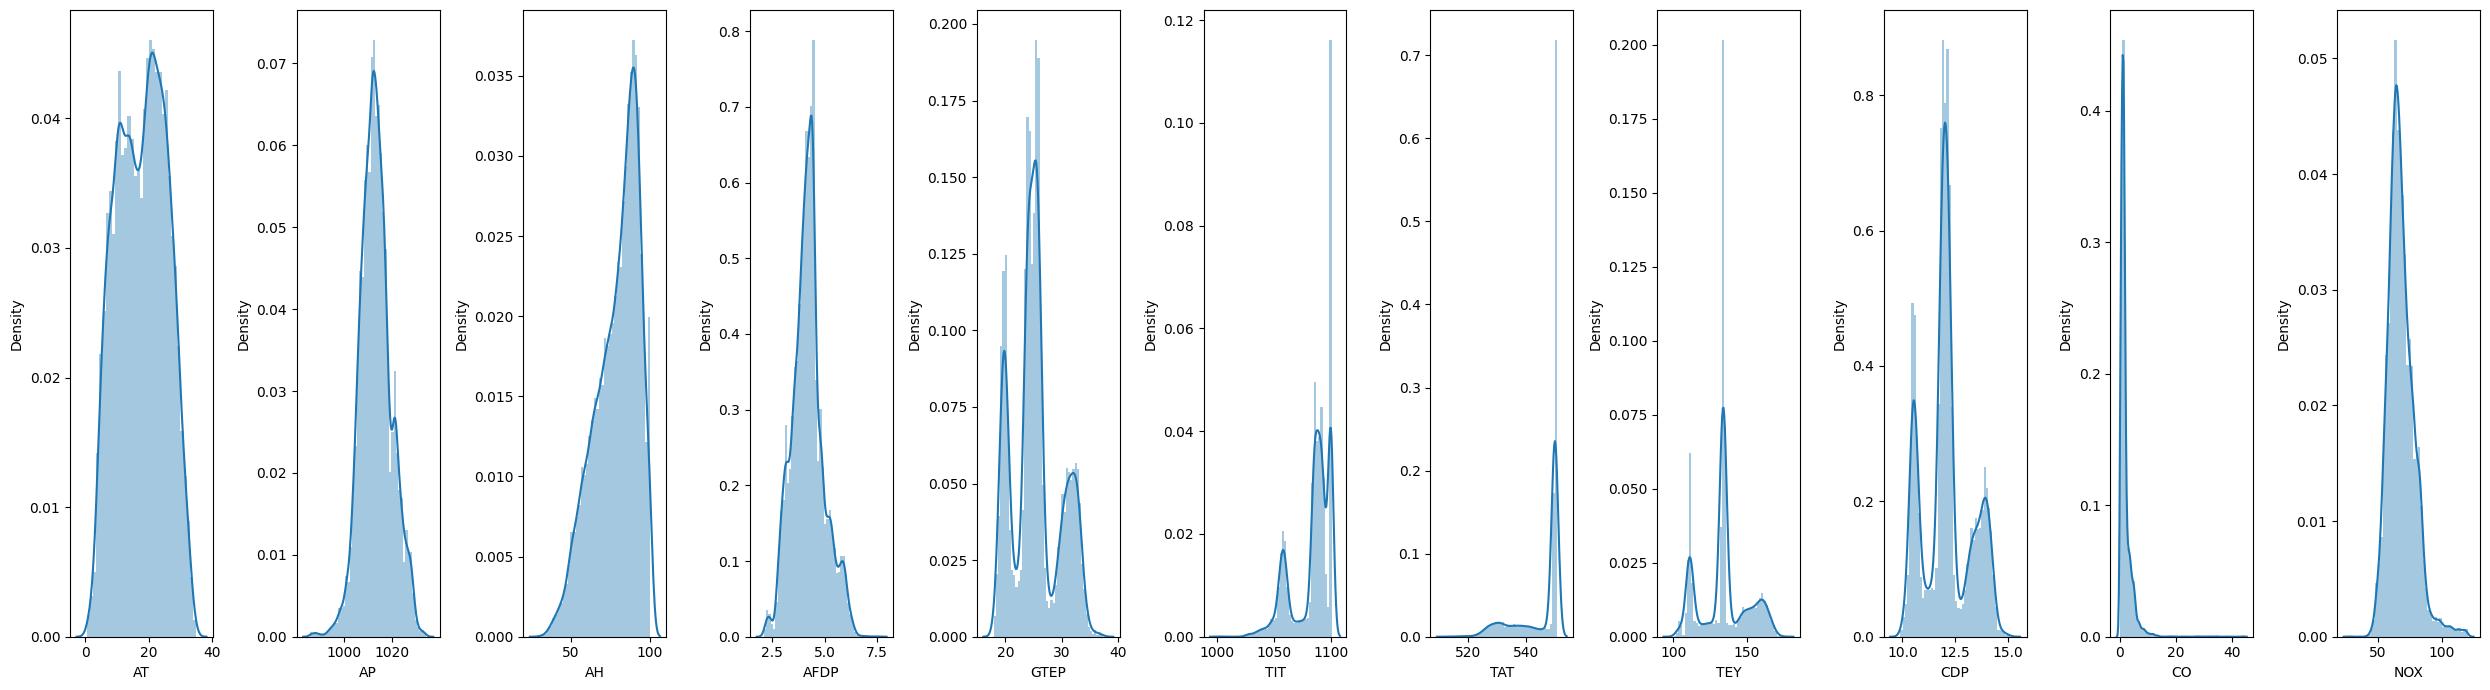

In [14]:
fig, ax = plt.subplots(1, 11, figsize=(25,7))
sns.distplot(gas_data.AT, ax=ax[0])
sns.distplot(gas_data.AP, ax=ax[1])
sns.distplot(gas_data.AH, ax=ax[2])
sns.distplot(gas_data.AFDP, ax=ax[3])
sns.distplot(gas_data.GTEP, ax=ax[4])
sns.distplot(gas_data.TIT, ax=ax[5])
sns.distplot(gas_data.TAT, ax=ax[6])
sns.distplot(gas_data.TEY, ax=ax[7])
sns.distplot(gas_data.CDP, ax=ax[8])
sns.distplot(gas_data.CO, ax=ax[9])
sns.distplot(gas_data.NOX, ax=ax[10])
plt.tight_layout()
plt.show()

In [15]:
X = gas_data.drop(columns=['TEY'])
y = gas_data['TEY']


In [16]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [17]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,4.913654e-16,-1.875504e-14,2.570219e-16,1.511894e-16,-7.559468e-17,-3.260021e-15,1.640405e-15,1.965462e-16,3.779734e-17,4.233302e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00,-2.779497e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-1.992416e+00,-8.874862e-01,-3.861033e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01,-6.266930e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-4.354335e-01,-5.015202e-01,-6.578107e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01,-1.854065e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-7.011925e-02,-2.620452e-01,-1.518527e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01,4.612196e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.311680e-01,8.455882e-02,5.486567e-01
max,2.266234e+00,3.275970e+00,1.528011e+00,4.486233e+00,2.871006e+00,1.028678e+00,6.627839e-01,2.700105e+00,1.895949e+01,4.937717e+00


In [1]:
# Importing the necessary packages

!pip install keras==2.12.0
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Build the ANN model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
376/376 [==============================] - 6s 6ms/step - loss: 11192.0283
Epoch 2/50
376/376 [==============================] - 2s 6ms/step - loss: 635.0739
Epoch 3/50
376/376 [==============================] - 2s 5ms/step - loss: 250.1885
Epoch 4/50
376/376 [==============================] - 1s 4ms/step - loss: 164.7673
Epoch 5/50
376/376 [==============================] - 1s 3ms/step - loss: 116.7719
Epoch 6/50
376/376 [==============================] - 1s 3ms/step - loss: 87.4364
Epoch 7/50
376/376 [==============================] - 1s 3ms/step - loss: 67.7255
Epoch 8/50
376/376 [==============================] - 1s 3ms/step - loss: 53.3769
Epoch 9/50
376/376 [==============================] - 1s 3ms/step - loss: 41.8918
Epoch 10/50
376/376 [==============================] - 1s 4ms/step - loss: 32.2144
Epoch 11/50
376/376 [==============================] - 1s 4ms/step - loss: 23.9865
Epoch 12/50
376/376 [==============================] - 1s 3ms/step - loss: 17.7684
Epoch 

In [26]:
# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

94/94 [==============================] - 0s 4ms/step


In [28]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [29]:
print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 0.3659961396621187
Test MSE: 0.3642334310582827


94/94 [==============================] - 0s 4ms/step


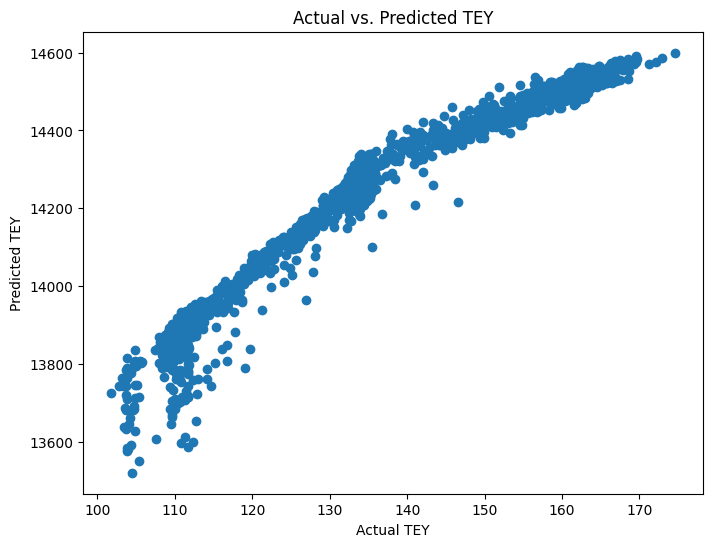

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

predictions = model.predict(X_test)

# Actual vs. Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual TEY')
plt.ylabel('Predicted TEY')
plt.title('Actual vs. Predicted TEY')
plt.show()